>The dataset contains raw data (over 1 million observations) for 9 different physical activities (such as walking, running, cycling, sitting, etc) performed by 7 subjects wearing each 3 inertial measurement units (IMU) and a heart rate monitor (HR). The IMU sensors were positioned as follows:

* 1 IMU on the right wrist of the user
* 1 IMU on the chest
* 1 IMU on the right ankle
* The IMU sensory data contains the following measures:
    3D-accelerometer data (m/s2)
    3D-gyroscope data (rad/s)
    3D-magnetometer data (μT)

>The IMU sensors have a sampling frequency of 100Hz and the sampling frequency of the HR-monitor is approximately 9Hz. Given the difference in the frequency of the captured data, the missing HR-values are indicated with NaN in the dataset. 



In [1]:
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt
import folium
from folium import plugins
from mpl_toolkits.basemap import Basemap
import reverse_geocode 


# set plot style
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)

Populating the interactive namespace from numpy and matplotlib


## 0) Load data and preprocess 

In [40]:
# help func
# feature engineering 
# -------------------------------

def get_wrist_accelerometer(x,y,z):
    #print ( np.sqrt(x**2 + y**2 + z**2))
    return np.sqrt(x**2 + y**2 + z**2)

def get_wrist_gyroscope():
    pass

def get_wrist_magnetometer():
    pass


# -------------------------------

In [22]:
df.columns

Index(['timestamp', 'activity_id', 'heart_rate', 'wrist_accelerometer_x',
       'wrist_accelerometer_y', 'wrist_accelerometer_z', 'wrist_gyroscope_x',
       'wrist_gyroscope_y', 'wrist_gyroscope_z', 'wrist_magnetometer_x',
       'wrist_magnetometer_y', 'wrist_magnetometer_z', 'chest_accelerometer_x',
       'chest_accelerometer_y', 'chest_accelerometer_z', 'chest_gyroscope_x',
       'chest_gyroscope_y', 'chest_gyroscope_z', 'chest_magnetometer_x',
       'chest_magnetometer_y', 'chest_magnetometer_z', 'ankle_accelerometer_x',
       'ankle_accelerometer_y', 'ankle_accelerometer_z', 'ankle_gyroscope_x',
       'ankle_gyroscope_y', 'ankle_gyroscope_z', 'ankle_magnetometer_x',
       'ankle_magnetometer_y', 'ankle_magnetometer_z', 'user_id'],
      dtype='object')

In [32]:
# load the data 

df=pd.read_csv('imu_activity_recognition.csv')



In [ ]:
# feature extract 

# get wrist_accelerometer in 3-D
df['wrist_accelerometer'] = df.apply(lambda row : pd.Series(get_wrist_accelerometer(
                                                            row['wrist_accelerometer_x'],
                                                            row['wrist_accelerometer_y'],
                                                            row['wrist_accelerometer_z']))
                                                             ,axis=1)


In [36]:
dfx[['wrist_accelerometer_x','wrist_accelerometer_y','wrist_accelerometer_z','wrist_accelerometer']]

,wrist_accelerometer_x,wrist_accelerometer_y,wrist_accelerometer_z,wrist_accelerometer
0,2.21530,8.27915,5.58753,10.230952
1,2.29196,7.67288,5.74467,9.855324
2,2.29090,7.14240,5.82342,9.496016
3,2.21800,7.14365,5.89930,9.526437
4,2.30106,7.25857,6.09259,9.751993
5,2.07165,7.25965,6.01218,9.650936
6,2.41148,7.59780,5.93915,9.940589
7,2.32815,7.63431,5.70686,9.811790
8,2.25096,7.78598,5.62821,9.867373
9,2.14107,7.52262,5.78141,9.726186


## 1) Data overview

In [3]:
df.head(3)

,timestamp,activity_id,heart_rate,wrist_accelerometer_x,wrist_accelerometer_y,wrist_accelerometer_z,wrist_gyroscope_x,wrist_gyroscope_y,wrist_gyroscope_z,wrist_magnetometer_x,...,ankle_accelerometer_x,ankle_accelerometer_y,ankle_accelerometer_z,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,user_id
0,37.66,lying,NaN,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,...,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,a
1,37.67,lying,NaN,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,...,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,a
2,37.68,lying,NaN,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,...,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,a


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a9e47f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11addaf28>]], dtype=object)

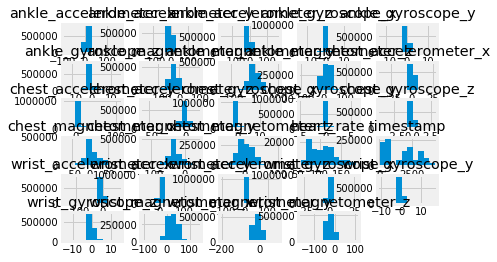

In [16]:
#fig, axs = plt.subplots(ncols=3,figsize=(15,3))
#plt.figure(figsize=(20, 6))
df.hist()

In [7]:
# heart rate

print ('null heart_rate :', len(df[df.heart_rate.isnull()]['heart_rate']))
print ('all data :', len(df))

null heart_rate : 1052560
all data : 1158399


---- walking ----
---- lying ----
---- standing ----
---- sitting ----
---- cycling ----
---- ascending_stairs ----
---- descending_stairs ----
---- running ----
---- rope_jumping ----


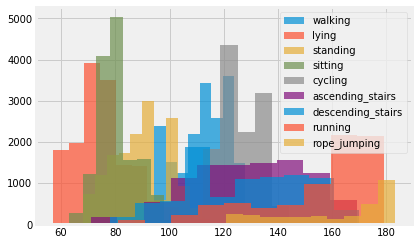

In [8]:
# heart rate hist 


df_heart_rate= df[~df.heart_rate.isnull()]

for i in df.activity_id.value_counts().keys():
    print ('----', i, '----')
    df_heart_rate[df_heart_rate.activity_id == i]['heart_rate'].hist(alpha=.7)

legend(list(df.activity_id.value_counts().keys()))

  

In [11]:
df.activity_id.value_counts()

walking              207228
lying                168358
standing             164771
sitting              162265
cycling              139125
ascending_stairs     105533
descending_stairs     95289
running               81667
rope_jumping          34163
Name: activity_id, dtype: int64

---- walking ----
---- lying ----
---- standing ----
---- sitting ----
---- cycling ----
---- ascending_stairs ----
---- descending_stairs ----
---- running ----
---- rope_jumping ----


(-20, 20)

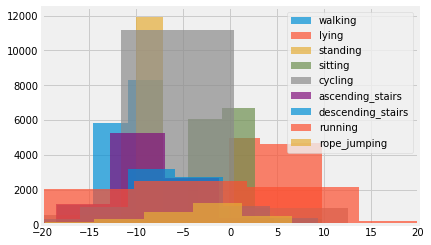

In [20]:
# wrist acce hist

for i in df.activity_id.value_counts().keys():
    print ('----', i, '----')
    df_heart_rate[df_heart_rate.activity_id == i]['wrist_accelerometer_x'].hist(alpha=.7)

legend(list(df.activity_id.value_counts().keys()))
plt.xlim(-20,20)
  

---- walking ----
---- lying ----
---- standing ----
---- sitting ----
---- cycling ----
---- ascending_stairs ----
---- descending_stairs ----
---- running ----
---- rope_jumping ----


(-20, 20)

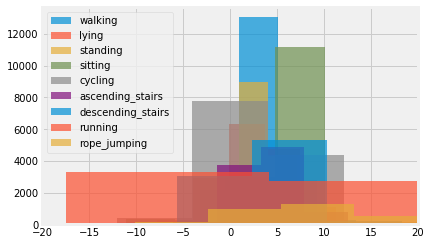

In [21]:
# wrist acce hist

for i in df.activity_id.value_counts().keys():
    print ('----', i, '----')
    df_heart_rate[df_heart_rate.activity_id == i]['wrist_accelerometer_y'].hist(alpha=.7)

legend(list(df.activity_id.value_counts().keys()))
plt.xlim(-20,20)
  